In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv( "https://wingated.github.io/cs180/autos.csv" )

In [ ]:
df

,Unnamed: 0,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,30,2,137.0,honda,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
1,31,2,137.0,honda,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
2,32,1,101.0,honda,gas,std,two,hatchback,fwd,front,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
3,33,1,101.0,honda,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
4,34,1,101.0,honda,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
124,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
125,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
126,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [ ]:
cnts = {}
for ind in range(len(df)):
  vehicle = df.loc[ind]
  make = vehicle["make"]
  num_doors = vehicle["num_doors"]

  if not num_doors == "four":
    continue

  if not make in cnts:
    cnts[make] = 0
  cnts[make] += 1

#  if vehicle["make"] == "honda" and vehicle["num_doors"] == "four":
#    honda_cnt += 1

In [ ]:
print(cnts)

{'honda': 5, 'mazda': 7, 'mitsubishi': 4, 'nissan': 9, 'subaru': 9, 'toyota': 18, 'volkswagen': 8, 'volvo': 11}


In [ ]:
pd.crosstab( df.make, df.body_style )

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


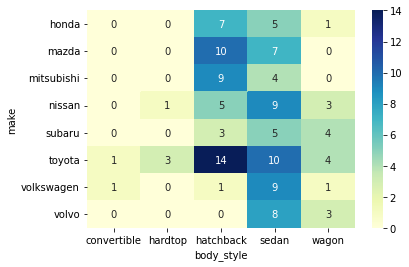

In [ ]:
sns.heatmap( pd.crosstab( df.make, df.body_style), cmap="YlGnBu", annot=True, cbar=True)

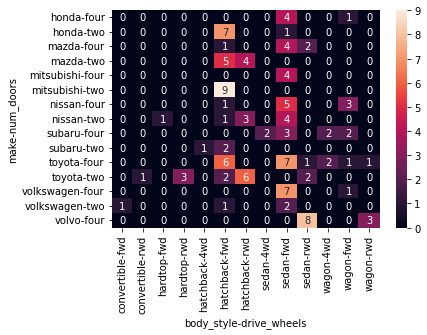

In [ ]:
sns.heatmap( pd.crosstab( [df.make, df.num_doors], [df.body_style, df.drive_wheels]), annot=True, cbar=True )

In [ ]:
df = pd.read_excel("https://wingated.github.io/cs180/sales-funnel.xlsx")

In [ ]:
import numpy as np

In [ ]:
df

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [ ]:
pd.pivot_table( df, index=["Manager","Rep"], values=["Price"], aggfunc=[np.mean, len])

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4